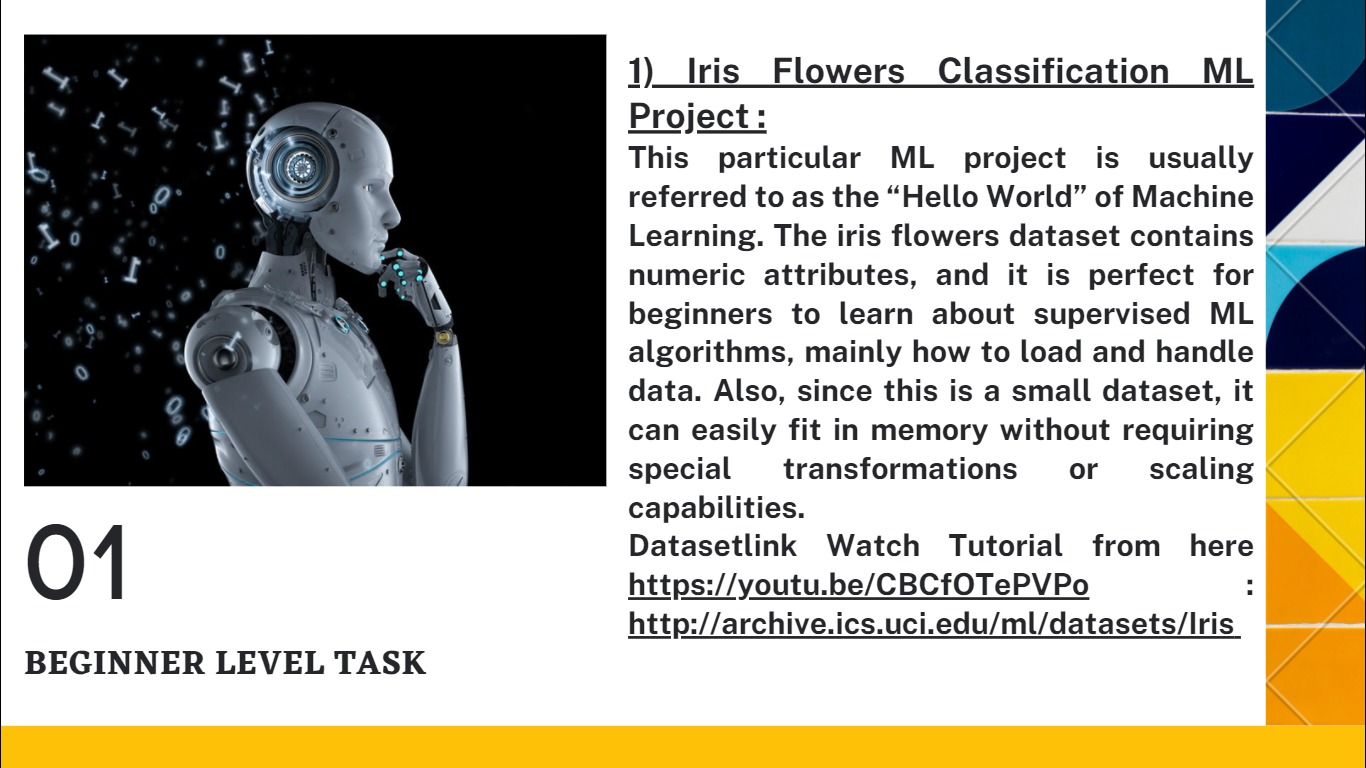

## import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## loading the dataset

In [2]:
df = pd.read_csv('C:/Users/tusha/Downloads/iris.data')

## top n rows of the dataset (n = 5 by default)

In [3]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## columns

In [4]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class']
df.columns = columns

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## statistical details

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## summary of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Class          149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## display no. of samples on each class

In [12]:
df['Class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: Class, dtype: int64

## Preprocessing

## check for null value

In [14]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Class            0
dtype: int64

## Exploratory data analysis

<AxesSubplot:>

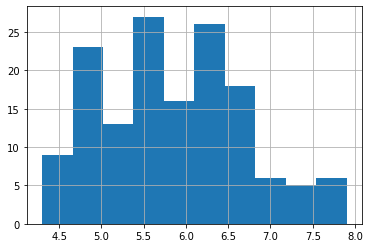

In [15]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

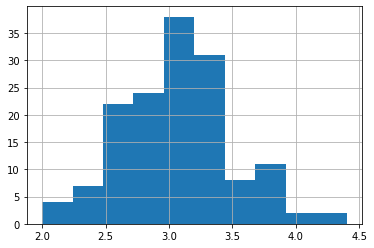

In [16]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

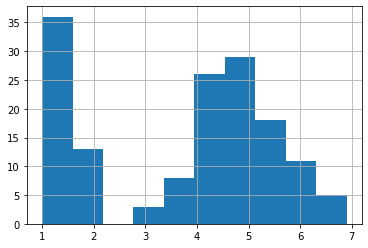

In [17]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

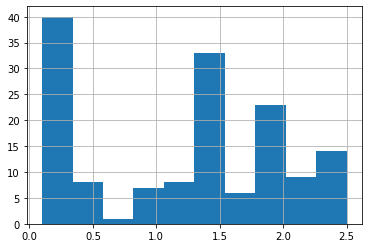

In [18]:
df['PetalWidthCm'].hist()

## Scatterplot

In [19]:
colors = ['red', 'pink', 'blue']
Class = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

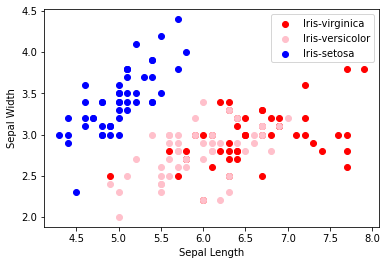

In [21]:
for i in range(3):
    x = df[df[('Class')] == Class[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = Class[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

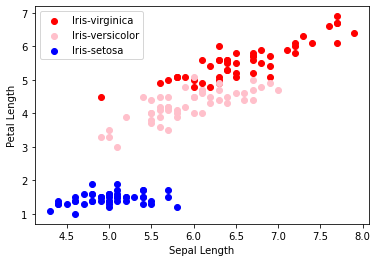

In [22]:
for i in range(3):
    x = df[df[('Class')] == Class[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = Class[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

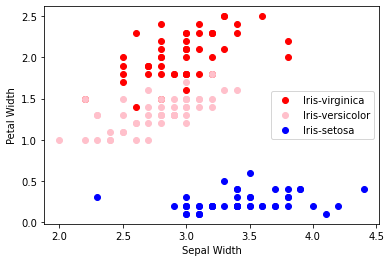

In [23]:
for i in range(3):
    x = df[df[('Class')] == Class[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = Class[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

## Coorelation Matrix

In [24]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.103784,0.871283,0.816971
SepalWidthCm,-0.103784,1.000000,-0.415218,-0.350733
PetalLengthCm,0.871283,-0.415218,1.000000,0.962314
PetalWidthCm,0.816971,-0.350733,0.962314,1.000000


<AxesSubplot:>

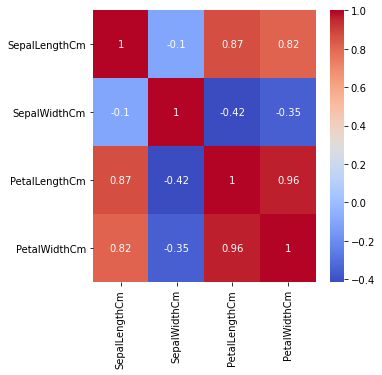

In [27]:
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

## Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [30]:
df['Class'] = l.fit_transform(df['Class'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


## Model Training

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Class'])
Y = df['Class']
x_train, x_test, y_train, ytest = train_test_split(X, Y, test_size = 0.30)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
print('Accuracy:', model.score(x_test, ytest)*100)

Accuracy: 100.0


## k-nearest neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [37]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
print('Accuracy:', model.score(x_test, ytest)*100)

Accuracy: 100.0


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [40]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
print('Accuracy:', model.score(x_test, ytest)*100)

Accuracy: 95.55555555555556
